In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import gc

In [2]:
np.random.seed(789)
tf.set_random_seed(789)

In [7]:
dim_play = pd.read_csv("U:\Datasets\DimPlayer.csv", low_memory = False)

In [8]:
dim_play.head()

,PrimaryPropertyID,PrimaryPropertyName,PlayerID,City,State,ZipCode,TierID,TierName,DistFromML,DistFromHK,...,Deceased Flag,DMA Flag,Person # Marital Status,Estimated Current Home Value,Children Presence of Children 0-18,DSE Discretionary Spend Estimate,Est Household Income V6,PIQ Match Type,NCOA MOVE DATE,NCOA Move Type
0,1,Grand Casino ML,33,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Married Extremely Likely,250300,Not as Likely to have a child,17831,138,Individual Match,NaN,Did Not Move
1,1,Grand Casino ML,10014,GARFIELD,MN,56332,25,Preferred,89.0,126.0,...,No,No,Married Extremely Likely,275300,Not Likely to have a child,16028,36,Individual Match,NaN,Did Not Move
2,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Unknown Scored,256800,Not Likely to have a child,27864,18,Individual Match,NaN,Did Not Move
3,1,Grand Casino ML,10063,TALMOON,MN,56637,25,Preferred,104.0,115.0,...,No,No,Married Extremely Likely,0,Not Likely to have a child,16742,49,Individual Match,NaN,Did Not Move
4,1,Grand Casino ML,10187,PEQUOT LAKES,MN,56472,25,Preferred,51.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dim_cpnredeem = pd.read_csv("U:\Datasets\FactCouponRedeem.csv", encoding = 'cp1252')

In [10]:
dim_cpnredeem.head()

,CouponID,Description,PlayerID,AccountingDate,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear,TypeCategory,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType
0,89729,M1216VHNY- VIP NYE HTL,530342410,2017-01-01,29.0,1,1,NaN,12,16,b,Hotel,a,ML,a,VIP,N,Not Applicable
1,89729,M1216VHNY- VIP NYE HTL,710328524,2017-01-01,29.0,1,1,NaN,12,16,b,Hotel,a,ML,a,VIP,N,Not Applicable
2,89093,C1016OGDO1E-Decline GP WKND 5,1000600137,2017-01-01,5.0,1,2,NaN,10,16,e,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable
3,89729,M1216VHNY- VIP NYE HTL,710004002,2017-01-01,29.0,1,1,NaN,12,16,b,Hotel,a,ML,a,VIP,N,Not Applicable
4,4,HNEW MEMBER TRACKING,1000681589,2017-01-01,0.0,1,2,NaN,4,7,O,Other,O,Other,c,New Member,N,Not Applicable


# Let's look at the players demographics

In [17]:
len(dim_play)

397643

In [25]:
dim_play.isnull().sum()

PrimaryPropertyID                           0
PrimaryPropertyName                         0
PlayerID                                    0
City                                        2
State                                      72
ZipCode                                     1
TierID                                      0
TierName                                    0
DistFromML                                  1
DistFromHK                                  1
LastPlayDate                             7295
Description                                 0
BirthMonth                                  0
BirthYear                                   0
PlayerStatus                                0
Prison Flag                             58225
Deceased Flag                           58151
DMA Flag                                58128
Person #  Marital Status               112749
Estimated Current Home Value           114714
Children  Presence of Children 0-18    114729
DSE  Discretionary Spend Estimate 

In [6]:
dim_play = dim_play.iloc[:,0:24] #remove last two columns as almost everything null

In [7]:
dim_play = dim_play.dropna()

In [8]:
dim_play = dim_play[dim_play['Est  Household Income V6'].str.isnumeric()]

In [34]:
pd.set_option('display.max_columns',None)

In [9]:
play_redeem = pd.merge(dim_play, dim_cpnredeem, on = 'PlayerID')

In [22]:
play_redeem.head()

,PrimaryPropertyID,PrimaryPropertyName,PlayerID,City,State,ZipCode,TierID,TierName,DistFromML,DistFromHK,...,ValidMonth,ValidYear,TypeCategory,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType
0,1,Grand Casino ML,33,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,10,19,b,Hotel,a,ML,d,Loyalty,a,Gazette
1,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,1,18,b,Hotel,X,All,N,Not Applicable,N,Not Applicable
2,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,3,18,b,Hotel,X,All,N,Not Applicable,N,Not Applicable
3,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,4,18,b,Hotel,X,All,N,Not Applicable,N,Not Applicable
4,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,10,18,c,Points,a,Match Point,N,Not Applicable,N,Not Applicable


In [24]:
forcluster = pd.DataFrame(play_redeem[['City','State','ZipCode','DistFromML','DistFromHK',
             'BirthYear', 'PlayerStatus','Prison Flag','DMA Flag',
             'Person #  Marital Status', 'Estimated Current Home Value',
             'DSE  Discretionary Spend Estimate','Est  Household Income V6']])

In [25]:
forcluster = forcluster.dropna()

In [26]:
forcluster['City'] = forcluster['City'].astype('category')
forcluster['State'] = forcluster['State'].astype('category')
forcluster['ZipCode'] = forcluster['ZipCode'].astype('category')
forcluster['BirthYear'] = forcluster['BirthYear'].astype('float64')
forcluster['Est  Household Income V6'] = forcluster['Est  Household Income V6'].astype('float64')

In [30]:
forcluster.to_csv(r"D:\Group Folder\forcluster.csv")

***
# R
***

#### Not many good kmodes implementations in python, so use R
Switch to R kernel

In [1]:
library(cluster)
library(tidyverse)
library(lubridate)
library(readr)
library(Rtsne)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.2
v tibble  2.1.1     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [2]:
data = read_csv('D:\\Group Folder\\forcluster.csv')

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  City = col_character(),
  State = col_character(),
  ZipCode = col_double(),
  DistFromML = col_double(),
  DistFromHK = col_double(),
  BirthYear = col_double(),
  PlayerStatus = col_character(),
  `Prison Flag` = col_character(),
  `DMA Flag` = col_character(),
  `Person #  Marital Status` = col_character(),
  `Estimated Current Home Value` = col_double(),
  `DSE  Discretionary Spend Estimate` = col_double(),
  `Est  Household Income V6` = col_double()
)
Warning message:
"34 parsing failures.
   row                               col expected                     actual                               file
898140 Estimated Current Home Value      a double Unknown Scored             'D:\Group Folder\forcluster.csv'
898140 DSE  Discretionary Spend Estimate a double Not Likely to have a child 'D:\Group Folder\forcluster.csv'
898141 Estimated Current Home Value      a dou

In [3]:
colnames(data)[11] <- 'MaritalStatus'

data$X1 <- NULL
names(data) = make.names(names(data))

data = data %>% drop_na()

data$City = as.factor(data$City)
data$State = as.factor(data$State)
data$ZipCode = as.factor(data$ZipCode)
data$PlayerStatus = as.factor(data$PlayerStatus)
data$Prison.Flag = as.factor(data$Prison.Flag)
data$DMA.Flag = as.factor(data$DMA.Flag)
data$MaritalStatus = as.factor(data$MaritalStatus)

In [9]:
set.seed(7171989)

data_s = sample_n(data,25000)

In [4]:
gower_dist = daisy(data_s, metric = "gower")

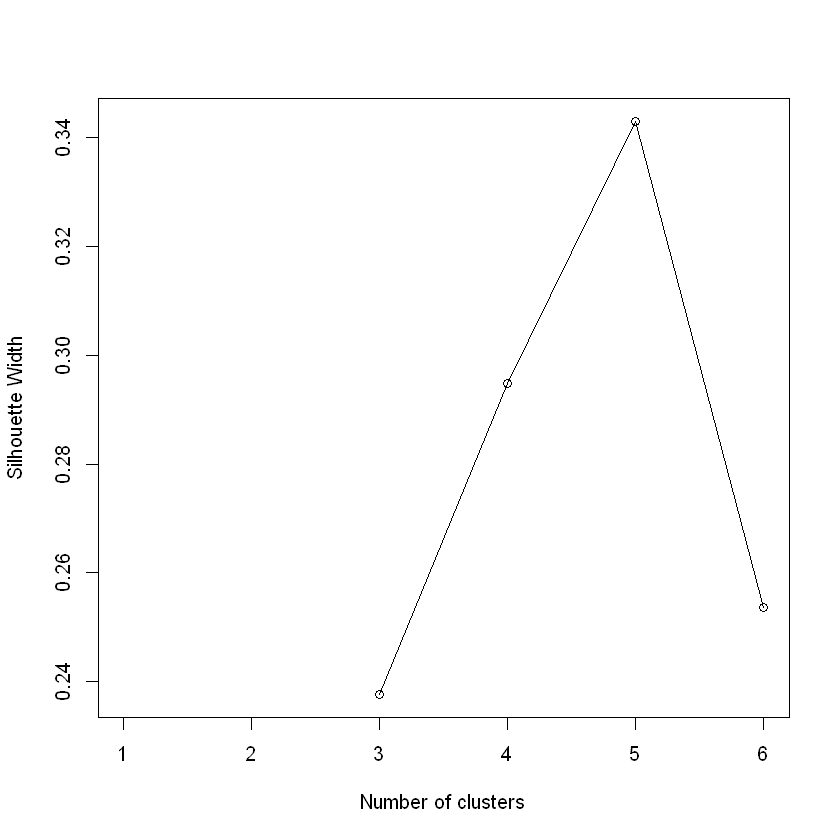

In [20]:
sil_width <- c(NA)
for(i in 3:6){
    pam_fit <- pam(gower_dist, diss = TRUE, k = i)
    sil_width[i] <- pam_fit$silinfo$avg.width
}

plot(1:6, sil_width,
    xlab = "Number of clusters",
    ylab = "Silhouette Width")
lines(1:6, sil_width)

In [7]:
data_s = data_s[columns]

In [8]:
k = 5
pam_fit <- pam(gower_dist, diss = TRUE, k)
pam_results <-data_s %>% mutate(cluster = pam_fit$clustering) %>% group_by(cluster) %>% do(the_summary = summary(.))
pam_results$the_summary

[[1]]
          City         State        BirthYear    PlayerStatus DMA.Flag  
 SAINT PAUL :846   MN     :2010   Min.   :1923   A:1999       No :2109  
 SAINT CLOUD:106   WI     :  87   1st Qu.:1950   D: 129       Yes:  20  
 ONAMIA     : 84   ND     :  11   Median :1960   M:   1                 
 MINNEAPOLIS: 48   IA     :   4   Mean   :1962                          
 PRINCETON  : 46   MI     :   4   3rd Qu.:1972                          
 DULUTH     : 43   AZ     :   2   Max.   :2000                          
 (Other)    :956   (Other):  11                                         
                     MaritalStatus  Estimated.Current.Home.Value
 Married Extremely Likely   : 247   Min.   :      0             
 Married Likely             :  99   1st Qu.:      0             
 Single Likely Never Married:1545   Median : 144100             
 Unknown Not Scored         : 122   Mean   : 137156             
 Unknown Scored             : 116   3rd Qu.: 213300             
                    

In [75]:
data_s = data_s %>% mutate(cluster = pam_fit$clustering)

In [10]:
data_s = data_s %>% mutate(age = 2020 - BirthYear)

In [11]:
tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)

In [12]:
tsne_data <- tsne_obj$Y %>% 
    data.frame() %>% 
    setNames(c("X", "Y")) %>% 
    mutate(cluster = factor(pam_fit$clustering))

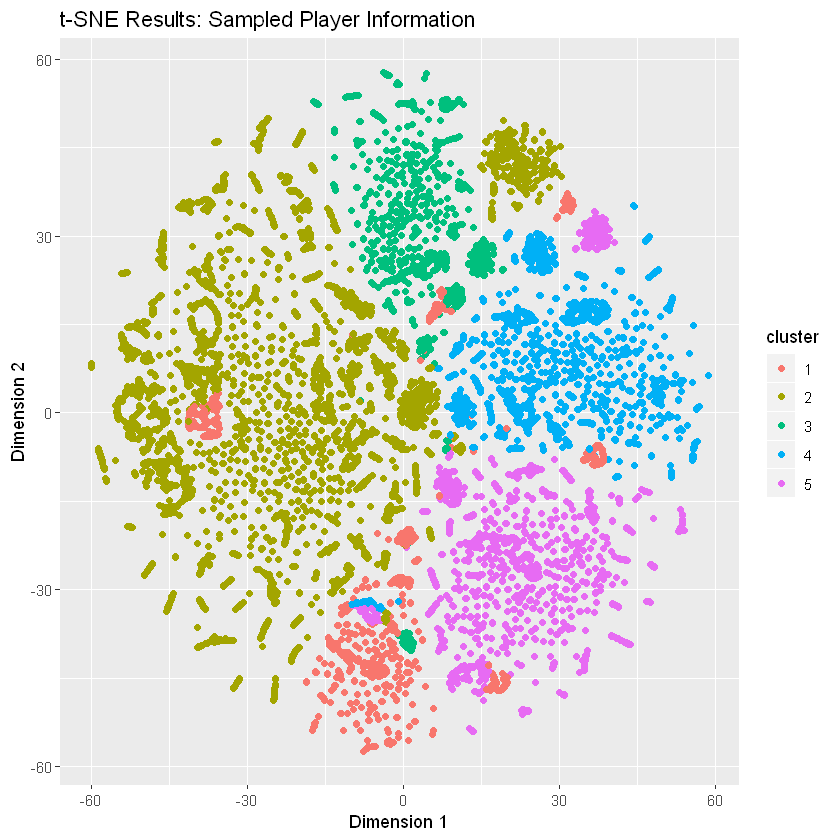

In [16]:
ggplot(aes(x = X, y = Y), data = tsne_data) +
    geom_point(aes(color = cluster)) + 
    ggtitle("t-SNE Results: Sampled Player Information") + 
    labs(x="Dimension 1", y = "Dimension 2")

In [60]:
age = ggplot(data_s, aes(x=as.factor(cluster), y = age, fill = cluster)) + 
    geom_boxplot() + 
    ylim(0,105) +
    labs(x = "", y = "Age") +
    theme(legend.title = element_blank()) +
    theme(legend.position = "none")

In [61]:
income = ggplot(data_s, aes(x=as.factor(cluster), y = Est..Household.Income.V6, fill = cluster)) + 
    geom_boxplot() + 
    ylim(0,200) +
    labs(x="Cluster", y = "Income ($ Thousands)") +
    theme(legend.title = element_blank()) +
    theme(legend.position = "none")

In [62]:
spend = ggplot(data_s, aes(x=as.factor(cluster), y = DSE..Discretionary.Spend.Estimate, fill = cluster)) + 
    geom_boxplot() +
    ylim(0,60000) +
    labs(x = "", y = "Discretionary Spend Estimate ($ Ones)") +
    theme(legend.title = element_blank()) +
    theme(legend.position = "none")

In [80]:
count = data_s %>% group_by(cluster) %>% summarize(count = n()) %>% 
ggplot(aes(x=cluster, y=count)) + geom_bar(stat = "identity") +
labs(x = "Cluster", y = "Player Count")

In [65]:
library(gridExtra)
library(grid)

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 584 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."

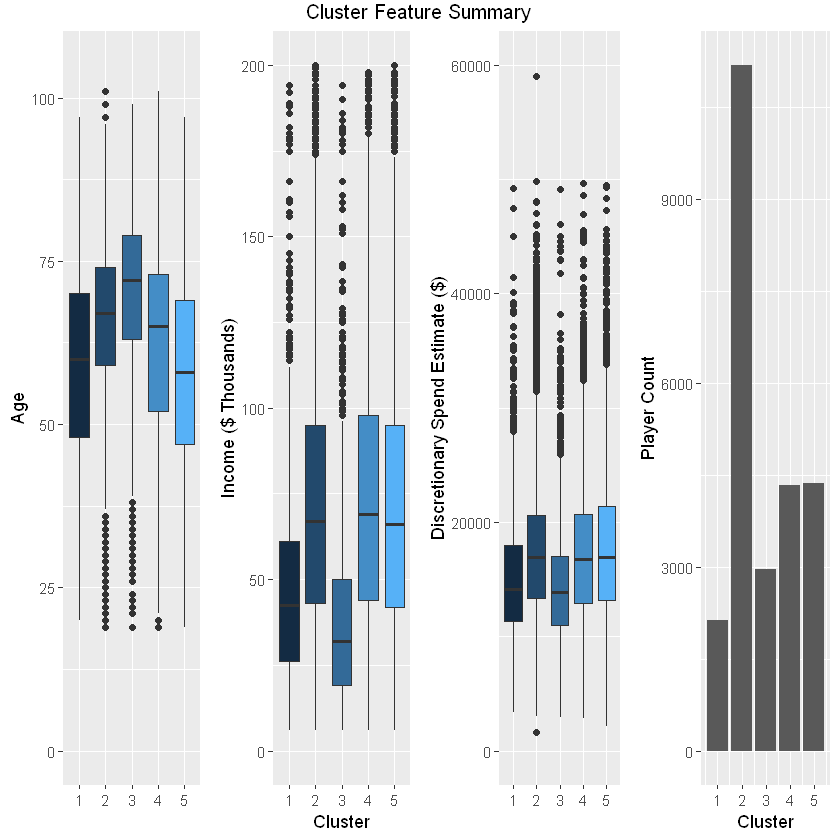

In [81]:
grid.arrange(age, income, spend,count, nrow = 1, top = textGrob("Cluster Feature Summary"))